In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
from mpl_toolkits.mplot3d import Axes3D

In [3]:
def espacios ():
    #Esta función es unicmamente de visulización, para facilitar la lectura
    print("\n"*2)
def sturges (data):
    #Esta función calcula el número de clases que se deben de tener en un histograma en funcion de la cantidad de datos
    n = len(data)
    k = 1 + 3.322*np.log10(n)
    return int(k)

In [4]:

# Cargamos el archivo de datos
sql_connection = sql.connect('data_01_nuevo.db')
data_01 = pd.read_sql_query("SELECT * FROM data_01_nuevo", sql_connection)
data_01['date'] = pd.to_datetime(data_01['date'])
data_01.set_index('date', inplace=True)


In [5]:
#Analis preliminar de la distribución de los datos
print(data_01.info())
espacios()
print(data_01.describe())
espacios()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 737453 entries, 2017-03-10 01:00:00 to 2017-09-09 23:00:00
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   % Iron Feed                   737453 non-null  float64
 1   % Silica Feed                 737453 non-null  float64
 2   Starch Flow                   737453 non-null  float64
 3   Amina Flow                    737453 non-null  float64
 4   Ore Pulp Flow                 737453 non-null  float64
 5   Ore Pulp pH                   737453 non-null  float64
 6   Ore Pulp Density              737453 non-null  float64
 7   Flotation Column 01 Air Flow  737453 non-null  float64
 8   Flotation Column 02 Air Flow  737453 non-null  float64
 9   Flotation Column 03 Air Flow  737453 non-null  float64
 10  Flotation Column 04 Air Flow  737453 non-null  float64
 11  Flotation Column 05 Air Flow  737453 non-null  float64
 12  Flotation 

In [6]:
#Se visualizan las columnas 
print(data_01.columns)


Index(['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')


In [7]:
#se genera una lista de las columnas que seran tenidas en cuenta
columnas = ['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       '% Iron Concentrate', '% Silica Concentrate']
data_01 = data_01[columnas]

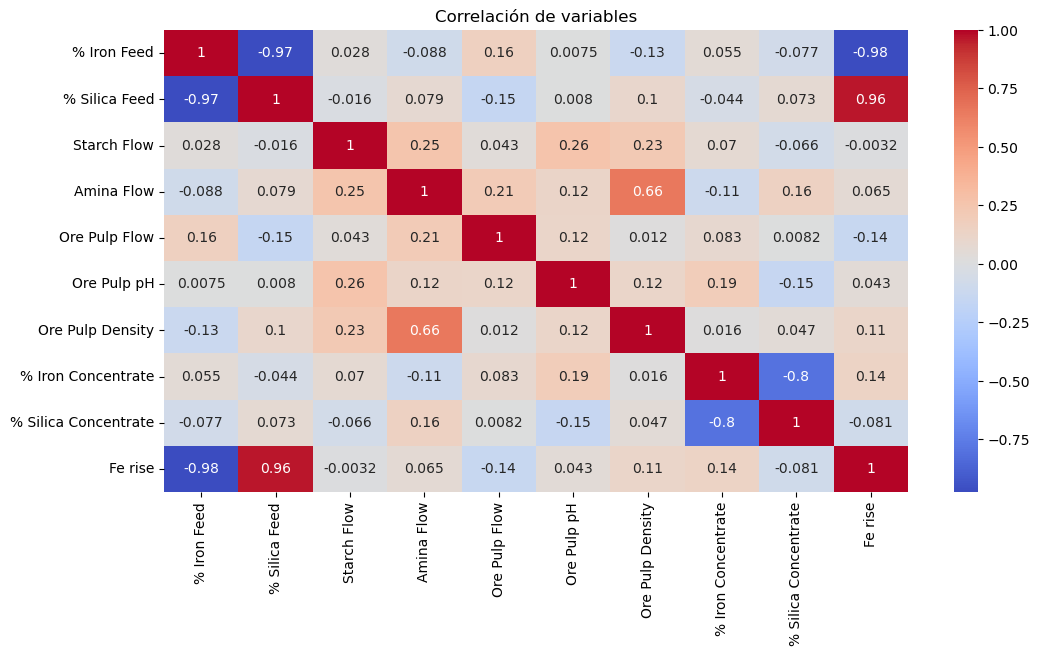

In [8]:

data_01["Fe rise"] = (data_01["% Iron Concentrate"] - data_01["% Iron Feed"])/data_01["% Iron Feed"]
plt.figure(figsize=(12, 6))
sns.heatmap(data_01.corr(), annot=True, cmap='coolwarm')
plt.title('Correlación de variables')
plt.show()


In [9]:
# plt.figure(figsize=(12, 6))
# sns.lineplot(data=data_01, x='date', y='Fe rise')
# plt.title('Variación de la concentración de hierro')
# plt.show()

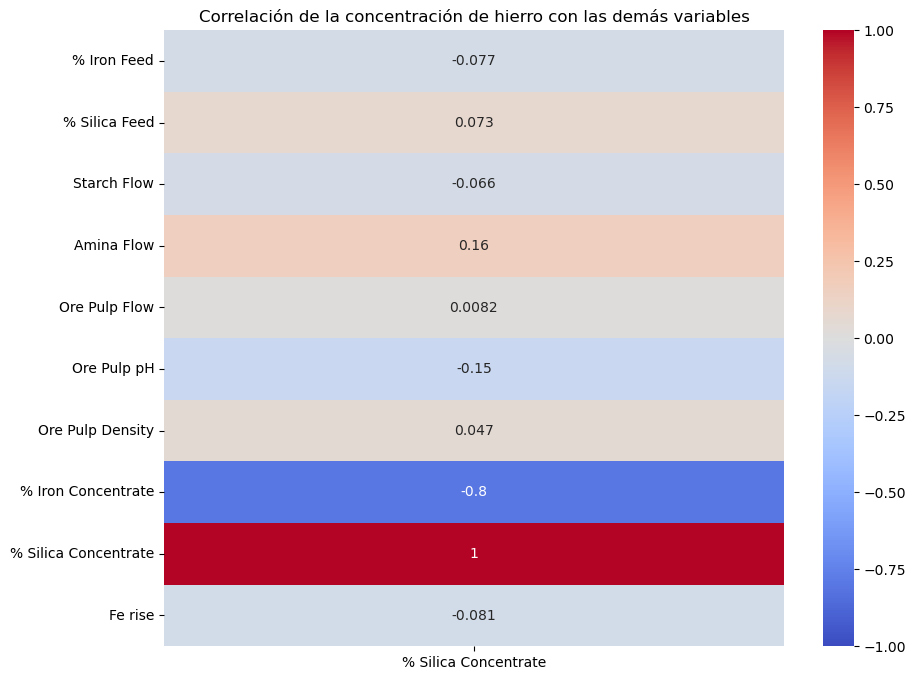

In [10]:
correlation_matrix = data_01.corr()
fe_rise_correlation = correlation_matrix[['% Silica Concentrate']]

# Graficar la correlación
plt.figure(figsize=(10, 8))
sns.heatmap(fe_rise_correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlación de la concentración de hierro con las demás variables')
plt.show()

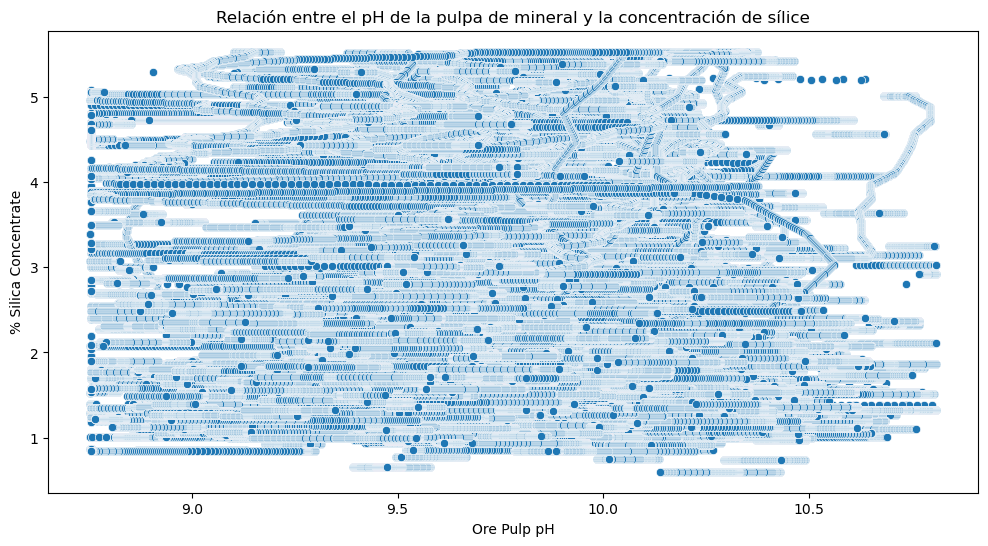

In [11]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data_01, x='Ore Pulp pH', y='% Silica Concentrate')
plt.title('Relación entre el pH de la pulpa de mineral y la concentración de sílice')
plt.show()

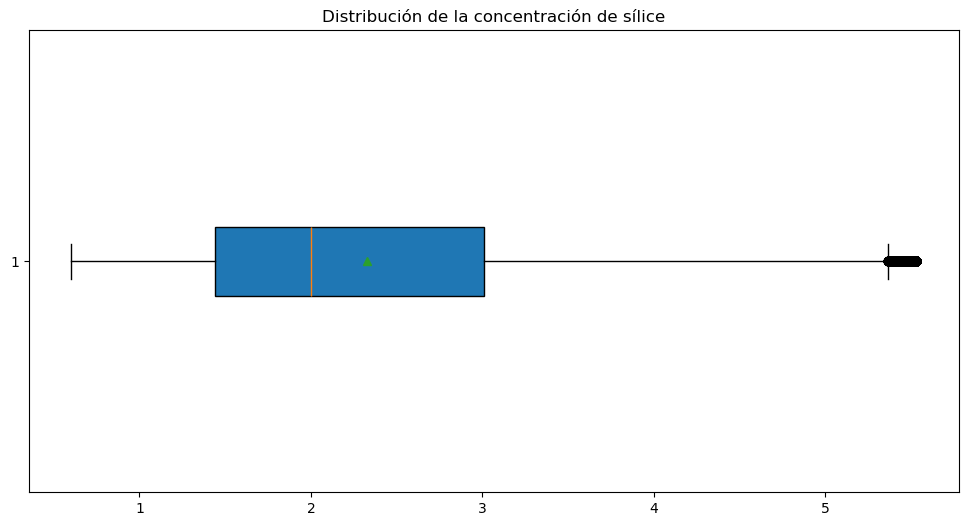

In [12]:
plt.figure(figsize=(12, 6))
plt.boxplot(data_01['% Silica Concentrate'], vert=False, patch_artist=True, showmeans=True)
plt.title('Distribución de la concentración de sílice')
plt.show()

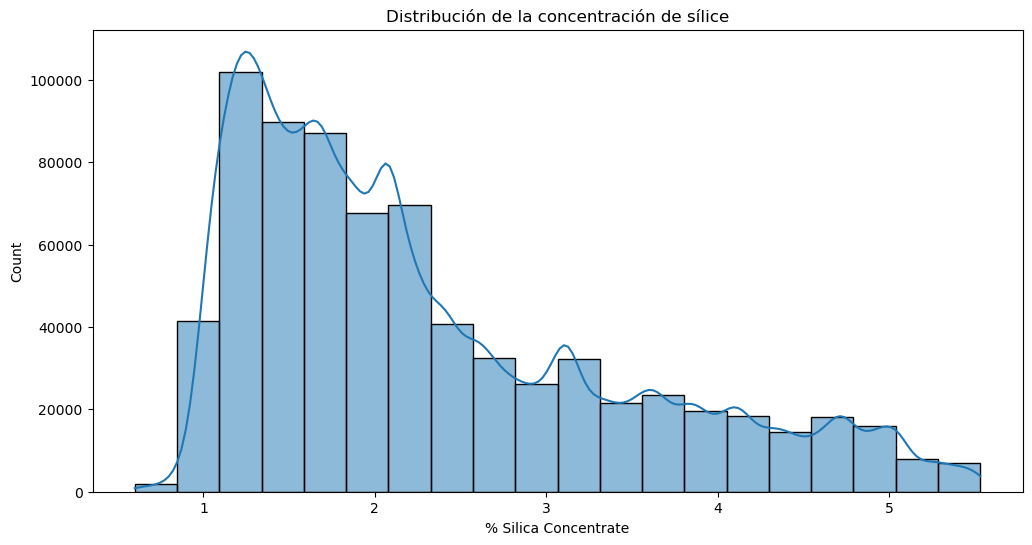

In [13]:
plt.figure(figsize=(12, 6))
sns.histplot(data_01['% Silica Concentrate'], kde=True, bins=sturges(data_01['% Silica Concentrate']))
plt.title('Distribución de la concentración de sílice')
plt.show()

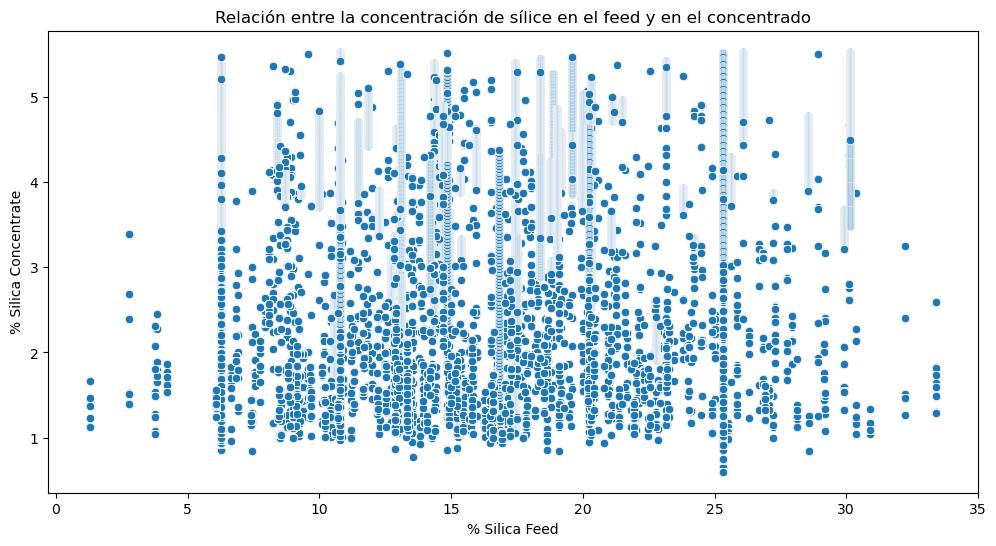

In [14]:
# Analisis de la concentración de sílice
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data_01, x='% Silica Feed', y='% Silica Concentrate')
plt.title('Relación entre la concentración de sílice en el feed y en el concentrado')
plt.show()

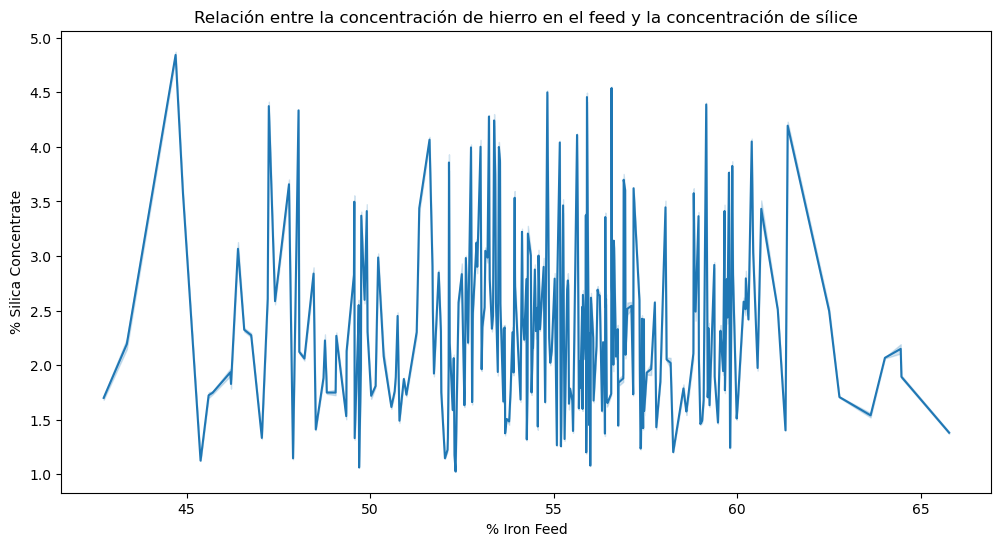

In [15]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_01, x='% Iron Feed', y='% Silica Concentrate')
plt.title('Relación entre la concentración de hierro en el feed y la concentración de sílice')
plt.show()

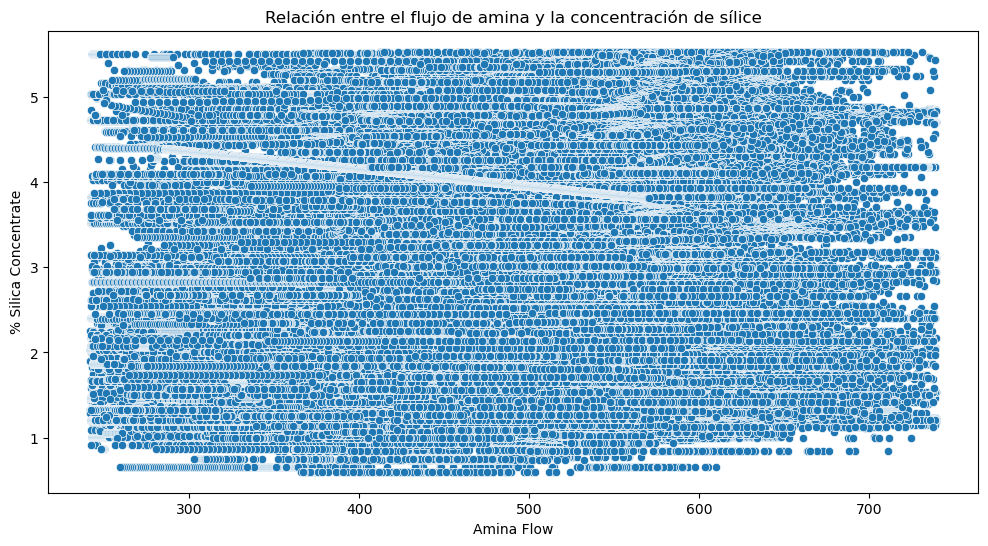

In [16]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data_01, x="Amina Flow", y='% Silica Concentrate')
plt.title('Relación entre el flujo de amina y la concentración de sílice')
plt.show()

In [36]:
#se crea un data filtrado en donde el valor de % Silica Concentrate sea mayor a 5
percentil_90 = data_01['% Silica Concentrate'].quantile(0.90)
print(f'Percentil 90: {percentil_90}')
data_filtrado = data_01[data_01['% Silica Concentrate'] > percentil_90]
data_filtrado_2 = data_01[data_01['% Silica Concentrate'] <= percentil_90]
print(data_filtrado.info())
espacios()
print(data_filtrado.describe())


Percentil 90: 4.14
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72668 entries, 2017-03-11 06:00:00 to 2017-09-09 00:00:00
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   % Iron Feed           72668 non-null  float64
 1   % Silica Feed         72668 non-null  float64
 2   Starch Flow           72668 non-null  float64
 3   Amina Flow            72668 non-null  float64
 4   Ore Pulp Flow         72668 non-null  float64
 5   Ore Pulp pH           72668 non-null  float64
 6   Ore Pulp Density      72668 non-null  float64
 7   % Iron Concentrate    72668 non-null  float64
 8   % Silica Concentrate  72668 non-null  float64
 9   Fe rise               72668 non-null  float64
dtypes: float64(10)
memory usage: 6.1 MB
None



        % Iron Feed  % Silica Feed   Starch Flow    Amina Flow  Ore Pulp Flow  \
count  72668.000000   72668.000000  72668.000000  72668.000000   72668.000000   
mean      55.1

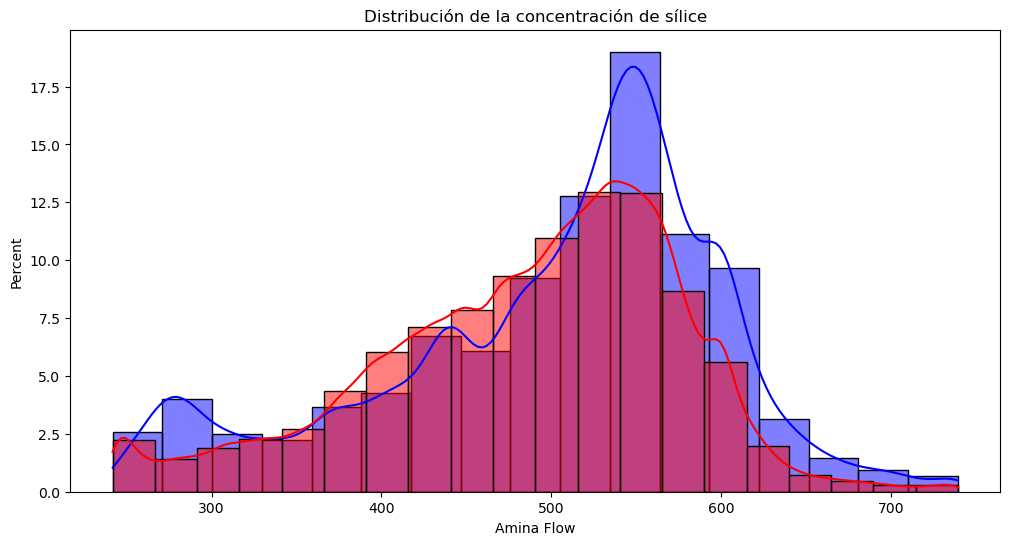

In [37]:
columna_evaluada="Amina Flow"
plt.figure(figsize=(12, 6))
sns.histplot(data_filtrado[columna_evaluada], kde=True, bins=sturges(data_filtrado[columna_evaluada]),stat="percent",color="blue")
sns.histplot(data_filtrado_2[columna_evaluada], kde=True, bins=sturges(data_filtrado_2[columna_evaluada]),stat="percent",color="red",legend=True)
plt.title('Distribución de la concentración de sílice')
plt.show()

In [38]:
print(data_filtrado[columna_evaluada].describe())
espacios()
print(data_filtrado_2[columna_evaluada].describe())

count    72668.000000
mean       501.353852
std        100.522771
min        241.773000
25%        443.468500
50%        526.733000
75%        567.912000
max        739.455000
Name: Amina Flow, dtype: float64



count    664785.000000
mean        486.700798
std          90.039415
min         241.669000
25%         430.571000
50%         502.319000
75%         551.395000
max         739.538000
Name: Amina Flow, dtype: float64
